In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


     blanco          gemeente  mandaten
0    1797.0             Aalst      43.0
1     797.0            Aalter      29.0
2     858.0          Aarschot      29.0
3     235.0        Aartselaar      23.0
4     343.0          Affligem      23.0
5     394.0             Alken      21.0
6     208.0        Alveringem      17.0
7    7731.0         Antwerpen      55.0
8     530.0           Anzegem      23.0
9     286.0           Ardooie      19.0
10    245.0          Arendonk      23.0
11    331.0                As      19.0
12    822.0              Asse      31.0
13    539.0          Assenede      23.0
14    465.0           Avelgem      21.0
15     32.0     Baarle-Hertog      11.0
16    696.0             Balen      27.0
17    554.0           Beernem      25.0
18    492.0            Beerse      25.0
19    613.0           Beersel      29.0
20    370.0      Begijnendijk      21.0
21    187.0        Bekkevoort      17.0
22   1289.0          Beringen      35.0
23    347.0           Berlaar      21.0


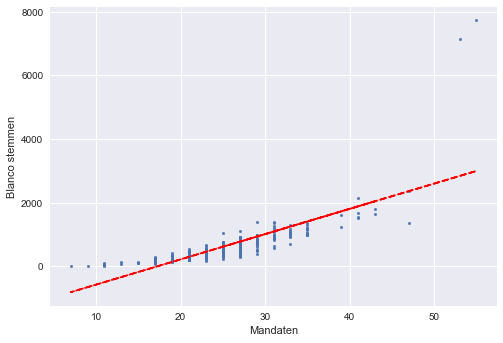

In [4]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import pandas as pd
import json

plt.style.use('seaborn')

Mandaten = list()
Blanco = list()
kieskring = list()
kieskring.append({"gemeente":"dsfdfsd", "partij":"sdfdsfsf"})



# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=mandaten,blanco_ongeldig,kieskring&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]


def search(gemeente):
       for d in kieskring:
            if(gemeente in d.values()):
                return True
            else:
                found = False
       return found


for x in data:
    if(search(x["kieskring"]) == False):
        thisdict = {
        "gemeente": x["kieskring"],
        "mandaten" : float(x["mandaten"]),
        "blanco" : float(x["blanco_ongeldig"])
        }
        kieskring.append(thisdict)

kieskring.pop(0)

#newlist = sorted(kieskring, key=lambda k: k['mandaten']) 

#print(len(newlist))

dataframe = pd.DataFrame(kieskring)
print(dataframe)

for p in kieskring:
    #if(float(p["mandaten"]) < 49 or float(p["blanco"]) < 2000):
        Mandaten.append(p["mandaten"])
        Blanco.append(p["blanco"])



print(pearsonr(Mandaten, Blanco))
print(len(Mandaten))
marker_size=7
plt.scatter(Mandaten, Blanco, marker_size)

z = np.polyfit(Mandaten, Blanco, 1)
p = np.poly1d(z)
plt.plot(Mandaten,p(Mandaten),"r--")

plt.xlabel("Mandaten")
plt.ylabel("Blanco stemmen")

plt.show()

#Er is een verband, er zijn meer blanco stemmen in grotere gemeentes (waar er meer mandaten zijn)
#sterke positieve correlatie






